# Aggregation Dataset

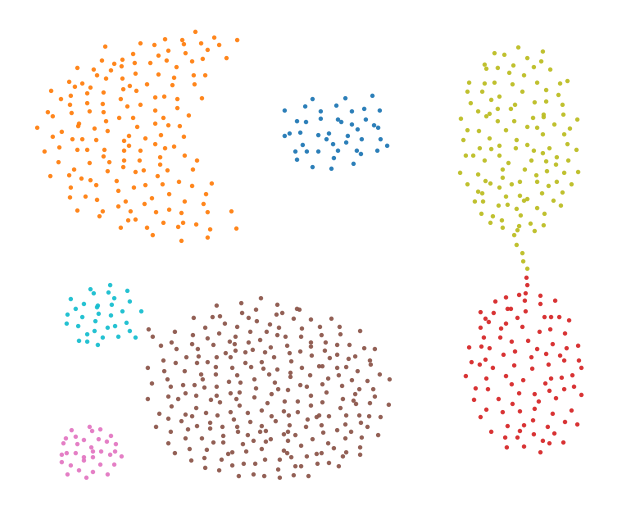

Saved figure to: figures\aggregation_dataset.png


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
DATA_PATH = Path("../datasets/synthetic/aggregation.txt")
FIG_DIR = Path("figures")
FIG_NAME = "aggregation_dataset.png"

def main():
    FIG_DIR.mkdir(parents=True, exist_ok=True)

    # Load data: supports 2 or 3 columns (x, y[, label])
    data = np.loadtxt(DATA_PATH)
    if data.ndim == 1:
        data = data[None, :]  # handle single-line edge case

    if data.shape[1] == 2:
        x, y = data[:, 0], data[:, 1]
        labels = None
    else:
        x, y, labels = data[:, 0], data[:, 1], data[:, 2].astype(int)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    if labels is None:
        ax.scatter(x, y, s=8, alpha=0.9, edgecolors="none")
    else:
        sc = ax.scatter(
            x, y,
            c=labels,
            cmap="tab10",
            s=10,
            alpha=0.95,
            edgecolors="none",
        )

    ax.set_aspect("equal", adjustable="box")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    fig.tight_layout(pad=0.05)

    out_path = FIG_DIR / FIG_NAME
    fig.savefig(out_path, dpi=300, transparent=True)
    plt.show()
    plt.close(fig)

    print(f"Saved figure to: {out_path}")

if __name__ == "__main__":
    main()

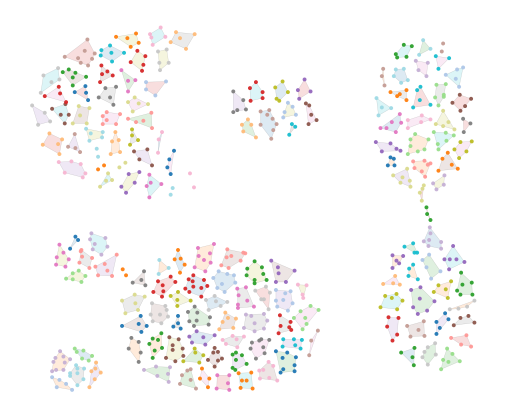

Saved figure to: figures\aggregation_overcluster_k150.png


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

DATA_PATH = Path("../datasets/synthetic/aggregation.txt")
FIG_DIR = Path("figures")
FIG_NAME = "aggregation_overcluster_k150.png"

N_CLUSTERS = 150
KMEANS_N_INIT = 50
KMEANS_MAX_ITER = 500

def main():
    FIG_DIR.mkdir(parents=True, exist_ok=True)

    # ----- Load 2D data (optionally with labels in 3rd column) -----
    data = np.loadtxt(DATA_PATH)
    if data.ndim == 1:
        data = data[None, :]

    X = data[:, :2]  # we only need the 2D coordinates

    # ----- KMeans over-clustering -----
    kmeans = KMeans(
        n_clusters=N_CLUSTERS,
        n_init=KMEANS_N_INIT,
        max_iter=KMEANS_MAX_ITER,
        random_state=42,
    )
    cluster_labels = kmeans.fit_predict(X)

    # ----- Plot -----
    fig, ax = plt.subplots(figsize=(7, 4))  # wide

    # Draw cluster areas (convex hulls)
    for k in range(N_CLUSTERS):
        idx = np.where(cluster_labels == k)[0]
        if idx.size < 3:
            continue  # need at least 3 points for a hull

        pts = X[idx]
        try:
            hull = ConvexHull(pts)
            hull_pts = pts[hull.vertices]
            ax.fill(
                hull_pts[:, 0],
                hull_pts[:, 1],
                alpha=0.15,
                linewidth=0.3,
                edgecolor="black",
            )
        except Exception:
            # Degenerate / collinear points – just skip the area
            continue

    # Scatter points on top
    sc = ax.scatter(
        X[:, 0],
        X[:, 1],
        c=cluster_labels,
        s=8,
        cmap="tab20",
        alpha=0.95,
        edgecolors="none",
    )

    ax.set_aspect("equal", adjustable="box")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    fig.tight_layout(pad=0.05)

    out_path = FIG_DIR / FIG_NAME
    fig.savefig(out_path, dpi=300, transparent=True)
    plt.show()
    plt.close(fig)

    print(f"Saved figure to: {out_path}")

if __name__ == "__main__":
    main()
